## Boston 911 Calls Data Analyis

#### INFO 6105 Data Science Eng Methods and Tools- Final Project
#### Team 15
Chetana Borancha - 001420430           
Ruhin Moghal-      0014499151         
Ashish Kumar-      0014499787                                                                   

1. Own code Lines- 320
2. External code lines- 80
3. Existing accuracy- NA
4. Our accuracy- 99.35 & 83.10
5. Time to run- 20 minutes

In this project we are going to work on Boston 911 calls data set from **Analyze Boston** website.Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015

This dataset contains records of crime incident reports using the new system starting in June of 2015 till last week.

Dataset link
https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

<br />
<center>
<img src = ipynb.images/911_call.jpg width = 400 />
</center>

#### Project Objectives:

#### Data Analysis:

    1. Data Cleansing and acquisition
    2. Reverse geocoding to obtain socioeconomic indicators
    3. Data Exploration
    4. Data analysis and Visulaisation using matplotlib
        4.1 Correlation Matrix
        4.2 Top crime categories
        4.3 Crime occurrences based on day of week and hour of day
        4.4 Time delta between intial and at scene time
        4.5 Heat map to visualize crime frequency using folium library 
        
#### Machine Learning:

    1. Feature selection using Decision Tree
    2. Logistic regression for predictive analysis 
        

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.linear_model import LogisticRegression

One could use a web browser to download the data, decompress the file and extract the CSV file, but it is preferable to create a small function to do that. It is useful in particular in cases where the data changes regularly, as it allows you to write a small script that you can run whenever you need to fetch the latest data . Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

In [105]:
import zipfile
with zipfile.ZipFile("Boston 911 data.zip","r") as zip_ref:
    zip_ref.extractall("Final Project")

Now let’s load the data using Pandas and read the dataset

In [106]:
calls = pd.read_excel('Boston 911 data.xlsx', infer_datetime_format=True)

In [107]:
calls.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,AT_SCENE_TIME,YEAR,...,Lat,Long,Location,Zip code,Population,Crimes per zip code,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,I152056757,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,714,No,2015-06-25 19:00:00,2015-06-25 21:19:21,2015,...,42.257,-71.161,"(42.25794926, -71.16122880)",2026,24711,0.01647,373700,84704,10184,9644
1,I162076724,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,821,No,2016-09-19 18:56:00,2016-09-19 20:00:32,2016,...,42.259,-71.159,"(42.25908200, -71.15958600)",2026,24711,0.01647,373700,84704,10184,9644
2,I182046712,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,821,No,2018-06-15 17:26:00,2018-06-15 20:15:49,2018,...,42.258,-71.157,"(42.25833321, -71.15771218)",2026,24711,0.01647,373700,84704,10184,9644
3,I182075019,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,723,No,2018-09-17 12:34:00,2018-09-17 13:59:54,2018,...,42.263,-71.168,"(42.26388334, -71.16849959)",2026,24711,0.01647,373700,84704,10184,9644
4,I172039167,423,Aggravated Assault,ASSAULT - AGGRAVATED,E5,714,No,2017-05-18 13:38:00,2017-05-18 13:45:19,2017,...,42.257,-71.161,"(42.25794926, -71.16122880)",2026,24711,0.01647,373700,84704,10184,9644


Calculate the percentage of missing values

## Convert Latitude and Longitude to Zipcodes To Acquire More Data

We can use the latitude and longitude to get the zipcode. Using the zipcode, we can also get the median wealth of the location, as we want to see if there are any patterns between call frequencies and socioeconomic status of the area.

We have selected uszipcode, an external library, for this task.uszipcode is the most powerful and easy to use zipcode information searchengine in Python. Besides geometry data (also boundary info), several useful census data points are also served: population, population density, total wage, average annual wage, house of units, land area, water area. 

<br />
<center>
<img src = ipynb.images/boston_zipcode.jpg width = 400 />
</center>

In [7]:
from uszipcode import SearchEngine
search = SearchEngine()

First let's test the library

In [8]:
zipcode = search.by_coordinates(42.354,-71.073, radius=50, returns=1)
zipcode

[SimpleZipcode(zipcode='02116', zipcode_type='Standard', major_city='Boston', post_office_city='Boston, MA', common_city_list=['Boston'], county='Suffolk County', state='MA', lat=42.35, lng=-71.08, timezone='Eastern', radius_in_miles=0.9659090909090909, area_code_list=['508', '617', '781', '978', '857'], population=20628, population_density=32724.0, land_area_in_sqmi=0.63, water_area_in_sqmi=0.1, housing_units=12644, occupied_housing_units=11026, median_home_value=807600, median_household_income=87653, bounds_west=-71.087445, bounds_east=-71.062575, bounds_north=42.358697, bounds_south=42.343184)]

Since the dataset is huge, we have taken unique latitude and longitude coordinates to obtain the zip code

In [9]:
Latlong = calls[['Lat','Long']]

In [10]:
Latlong = Latlong.drop_duplicates()
Latlong

,Lat,Long
0,42.257,-71.161
1,42.259,-71.159
2,42.258,-71.157
3,42.263,-71.168
6,42.260,-71.157
8,42.260,-71.159
9,42.258,-71.160
16,42.257,-71.160
17,42.261,-71.166
18,42.262,-71.167


We have 7780 unique combinations of Latitude and Longitude. We can now implement uszipcode library to obtain values of socio economic indicators. We have also used the tqdm library to display a progress bar, since this operation takes a lot of time

In [11]:
def get_data(col):
    lat = col['Lat']
    long = col['Long']
    zipcode = search.by_coordinates(lat, long, radius=50, returns=1)
    res = zipcode[0]
    
    return res.zipcode, res.population, res.median_home_value, res.median_household_income,res.housing_units, res.occupied_housing_units

In [12]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tqdm import tqdm
tqdm.pandas()
Latlong['zipcode','population','median_home_value','median_household_income','housing_units','occupied_housing_units']= (Latlong.progress_apply(lambda x: get_data(x),axis=1))

100%|██████████| 7780/7780 [13:04<00:00,  9.91it/s]


In [14]:
Latlong.head()

,Lat,Long,"(zipcode, population, median_home_value, median_household_income, housing_units, occupied_housing_units)"
0,42.257,-71.161,"(02026, 24711, 373700, 84704, 10184, 9644)"
1,42.259,-71.159,"(02026, 24711, 373700, 84704, 10184, 9644)"
2,42.258,-71.157,"(02026, 24711, 373700, 84704, 10184, 9644)"
3,42.263,-71.168,"(02026, 24711, 373700, 84704, 10184, 9644)"
6,42.260,-71.157,"(02026, 24711, 373700, 84704, 10184, 9644)"


In [15]:
Latlong.to_csv(r'Zipcode stats.csv')

Now that we have the socio economic indicators ready, we can do a lookup in Excel to join this data to the coordinates in the original dataset

In [66]:
calls_data = pd.read_excel("Boston 911 data - Final.xlsx")

In [17]:
calls_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_SUB GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,AT_SCENE_TIME,...,Lat,Long,Location,Zip code,Number of Crimes per area,Population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,I192028167,3006,Medical Assistance,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B3,459,No,2019-04-16 20:57:00,2019-04-16 21:03:24,...,42.304,-71.079,"(42.30438536, -71.07994459)",2121,36062,25978,311700,28238.0,10589,9661
1,I192028166,413,Assault,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,291,No,2019-04-16 20:52:00,2019-04-16 23:35:19,...,42.329,-71.093,"(42.32955354, -71.09357444)",2120,17596,15181,272900,35077.0,5335,5057
2,I192028166,802,Assault,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,291,No,2019-04-16 20:52:00,2019-04-16 22:50:50,...,42.329,-71.093,"(42.32955354, -71.09357444)",2120,17596,15181,272900,35077.0,5335,5057
3,I192028168,3410,Towed,Towed,TOWED MOTOR VEHICLE,C11,340,No,2019-04-16 20:25:00,2019-04-16 23:44:04,...,42.305,-71.065,"(42.30540715, -71.06547135)",2121,36062,25978,311700,28238.0,10589,9661
4,I192028159,3301,Verbal Disputes,Verbal Disputes,VERBAL DISPUTE,B2,302,No,2019-04-16 19:55:00,2019-04-16 21:10:29,...,42.324,-71.096,"(42.32432974, -71.09613470)",2120,17596,15181,272900,35077.0,5335,5057


Calculate percent of null values in each column

In [18]:
def get_missing_percentage(df):
    missing = df.isnull().sum()
    total = len(df)
    return round(missing/total, 2) # Round to nearest percentage

In [19]:
get_missing_percentage(calls_data)

INCIDENT_NUMBER              0.0
OFFENSE_CODE                 0.0
OFFENSE_CODE_GROUP           0.0
OFFENSE_CODE_SUB GROUP       0.0
OFFENSE_DESCRIPTION          0.0
DISTRICT                     0.0
REPORTING_AREA               0.0
SHOOTING                     0.0
OCCURRED_ON_DATE             0.0
AT_SCENE_TIME                0.0
YEAR                         0.0
MONTH                        0.0
DAY_OF_WEEK                  0.0
HOUR                         0.0
UCR_PART                     0.0
Lat                          0.0
Long                         0.0
Location                     0.0
Zip code                     0.0
Number of Crimes per area    0.0
Population                   0.0
Median_Home_Value            0.0
Median_Household_Income      0.0
Housing Units                0.0
Occupied Housing Units       0.0
dtype: float64

## Data Cleaning and Prep
Clean up dataset and prepare it for analysis

<br />
<center>
<img src = ipynb.images/data_cleaning.jpg width = 400 />
</center>

In [20]:
calls_data.dtypes

INCIDENT_NUMBER                      object
OFFENSE_CODE                          int64
OFFENSE_CODE_GROUP                   object
OFFENSE_CODE_SUB GROUP               object
OFFENSE_DESCRIPTION                  object
DISTRICT                             object
REPORTING_AREA                       object
SHOOTING                             object
OCCURRED_ON_DATE             datetime64[ns]
AT_SCENE_TIME                datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY_OF_WEEK                          object
HOUR                                  int64
UCR_PART                             object
Lat                                 float64
Long                                float64
Location                             object
Zip code                              int64
Number of Crimes per area             int64
Population                            int64
Median_Home_Value                     int64
Median_Household_Income         

In [21]:
# First, let's convert objects to int.
import numpy as np
calls_data['INCIDENT_NUMBER'] = pd.to_numeric(calls_data['INCIDENT_NUMBER'],errors='coerce').fillna(0).astype(np.int64)
calls_data['Population'] = pd.to_numeric(calls_data['Population'],errors='coerce').fillna(0).astype(np.int64)
calls_data['Median_Home_Value'] = pd.to_numeric(calls_data['Median_Home_Value'],errors='coerce').fillna(0).astype(np.int64)
calls_data['Median_Household_Income'] = pd.to_numeric(calls_data['Median_Household_Income'],errors='coerce').fillna(0).astype(np.int64)
calls_data['Housing Units'] = pd.to_numeric(calls_data['Housing Units'],errors='coerce').fillna(0).astype(np.int64)
calls_data['Housing Units'] = pd.to_numeric(calls_data['Housing Units'],errors='coerce').fillna(0).astype(np.int64)
calls_data.dtypes

INCIDENT_NUMBER                       int64
OFFENSE_CODE                          int64
OFFENSE_CODE_GROUP                   object
OFFENSE_CODE_SUB GROUP               object
OFFENSE_DESCRIPTION                  object
DISTRICT                             object
REPORTING_AREA                       object
SHOOTING                             object
OCCURRED_ON_DATE             datetime64[ns]
AT_SCENE_TIME                datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY_OF_WEEK                          object
HOUR                                  int64
UCR_PART                             object
Lat                                 float64
Long                                float64
Location                             object
Zip code                              int64
Number of Crimes per area             int64
Population                            int64
Median_Home_Value                     int64
Median_Household_Income         

In [22]:
# These columns should be category types
to_category = ['OFFENSE_DESCRIPTION', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA','Zip code'
              ]
# Note: Census Tract should be a category instead of a float.


In [23]:
calls_data[to_category] = calls_data[to_category].apply(lambda x: x.astype('category'))
calls_data.dtypes

INCIDENT_NUMBER                       int64
OFFENSE_CODE                          int64
OFFENSE_CODE_GROUP                 category
OFFENSE_CODE_SUB GROUP               object
OFFENSE_DESCRIPTION                category
DISTRICT                           category
REPORTING_AREA                     category
SHOOTING                             object
OCCURRED_ON_DATE             datetime64[ns]
AT_SCENE_TIME                datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY_OF_WEEK                          object
HOUR                                  int64
UCR_PART                             object
Lat                                 float64
Long                                float64
Location                             object
Zip code                           category
Number of Crimes per area             int64
Population                            int64
Median_Home_Value                     int64
Median_Household_Income         

The below columns should be datetimes

In [24]:
# These columns should be datetimes
to_datetime = ['OCCURRED_ON_DATE', 'AT_SCENE_TIME']

In [25]:
dt_format = '%m/%d/%Y %H:%M:%S %p'
calls_data['OCCURRED_ON_DATE'] = pd.to_datetime(calls_data['OCCURRED_ON_DATE'], format=dt_format)
calls_data.dtypes

INCIDENT_NUMBER                       int64
OFFENSE_CODE                          int64
OFFENSE_CODE_GROUP                 category
OFFENSE_CODE_SUB GROUP               object
OFFENSE_DESCRIPTION                category
DISTRICT                           category
REPORTING_AREA                     category
SHOOTING                             object
OCCURRED_ON_DATE             datetime64[ns]
AT_SCENE_TIME                datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY_OF_WEEK                          object
HOUR                                  int64
UCR_PART                             object
Lat                                 float64
Long                                float64
Location                             object
Zip code                           category
Number of Crimes per area             int64
Population                            int64
Median_Home_Value                     int64
Median_Household_Income         

The info() method is useful to get a quick description of the data, in particular the total number of rows and each attribute’s type and number of non-null

## Categorical Encoding
In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.

One-hot encoding would be preferred, but takes too long on such a big dataset with so many categories for each column.

In [26]:
# Select categorical columns
categorical = calls_data.select_dtypes(include=['category'])
list(categorical)

['OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'Zip code']

In [27]:
# Create new columns
for col in list(categorical):
    cat_string = col + ' Category'
    calls_data[cat_string] = calls_data[col].cat.codes

In [28]:
calls_data.dtypes

INCIDENT_NUMBER                          int64
OFFENSE_CODE                             int64
OFFENSE_CODE_GROUP                    category
OFFENSE_CODE_SUB GROUP                  object
OFFENSE_DESCRIPTION                   category
DISTRICT                              category
REPORTING_AREA                        category
SHOOTING                                object
OCCURRED_ON_DATE                datetime64[ns]
AT_SCENE_TIME                   datetime64[ns]
YEAR                                     int64
MONTH                                    int64
DAY_OF_WEEK                             object
HOUR                                     int64
UCR_PART                                object
Lat                                    float64
Long                                   float64
Location                                object
Zip code                              category
Number of Crimes per area                int64
Population                               int64
Median_Home_V

## Data Exploration and Visualization
Frequency histograms for:

- OFFENCE_CODE_GROUP
- OCCURED_ON_DATE
- Over time (Are calls increasing? decreasing?)
- Hour of the day (When are there the fewest/most calls?)
- District
- What's the delta between At Scene Time and Event Clearance Date?

First,let's determine the

- pearson correlations between the variables

<br />
<center>
<img src = ipynb.images/data_visual.jpg width = 400 />
</center>

In [29]:
# Correlation Matrix
corr_mat = calls_data.corr()

In [30]:
def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70);
    plt.yticks(range(len(corr.columns)), corr.columns);

Color Key:

- Yellow: Positive correlations
- Navy: Negative correlations

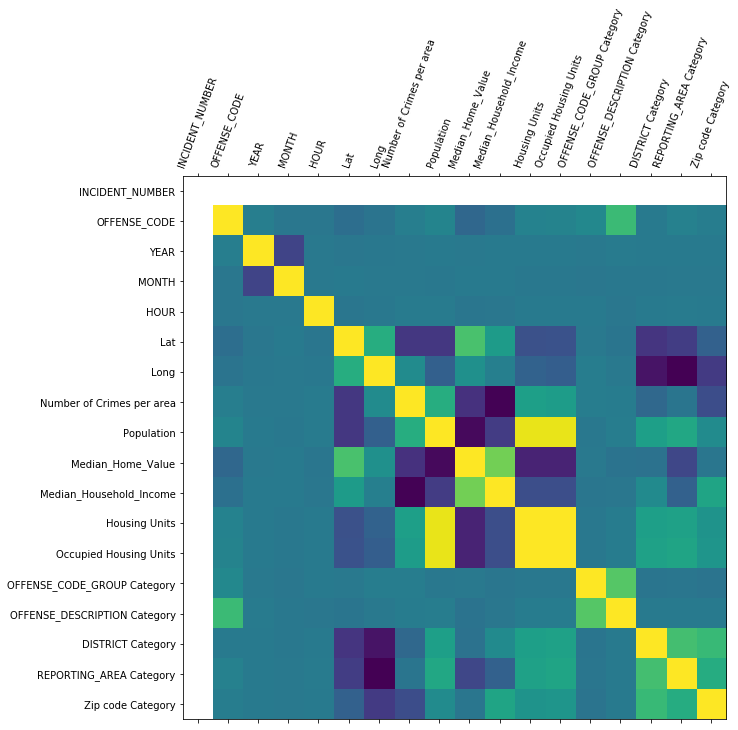

In [31]:
plot_corr(calls_data)

In [32]:
# Day of the Week
calls_data['day_of_week'] = calls_data['OCCURRED_ON_DATE'].dt.dayofweek

In [33]:
# hour of the day
calls_data['hour_of_day'] = calls_data['OCCURRED_ON_DATE'].dt.hour

In [34]:
list(categorical)

['OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'Zip code']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A50B52AC8>,
      dtype=object)

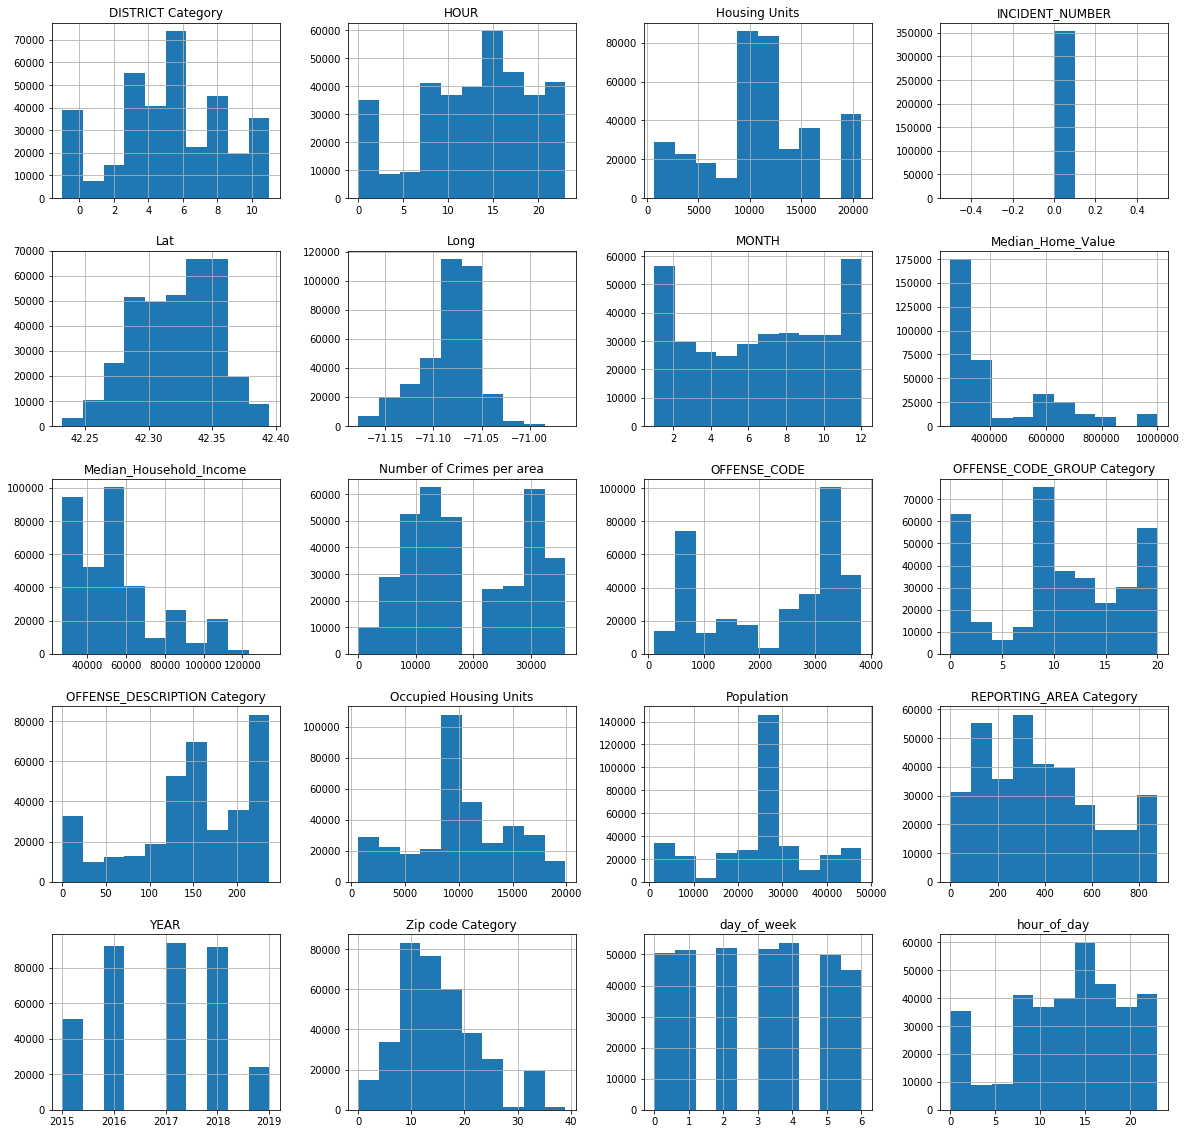

In [35]:
calls_data.hist(figsize=(20,20))

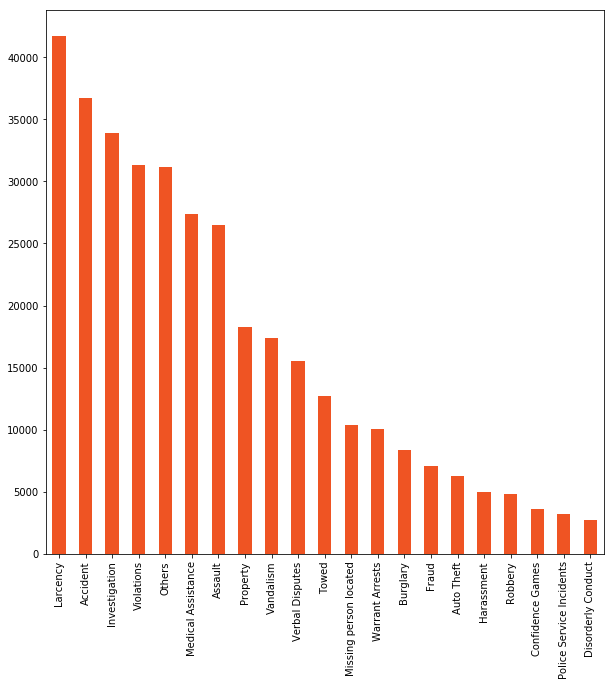

In [36]:
calls_data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(10,10),color='#ef5423')

It appears Larceny are the most frequent type of call, followed by Accident and Investigation

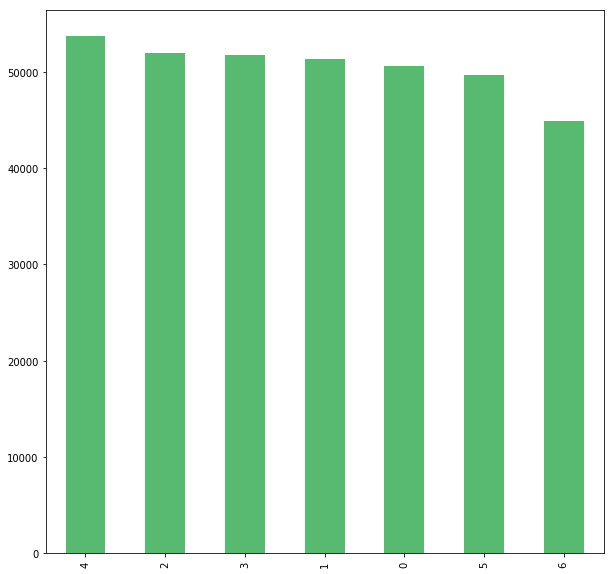

In [37]:
calls_data['day_of_week'].value_counts().plot(kind='bar', figsize=(10,10),color='#58b970')

Monday=0 Sunday=6.

Even though the days of the week are out of order (hehe woops), it doesn't appear that 911 calls are wildly more frequent on any given day. Friday has the most number of calls, and Sunday the least. Intuitively this doesn't seem too surprising

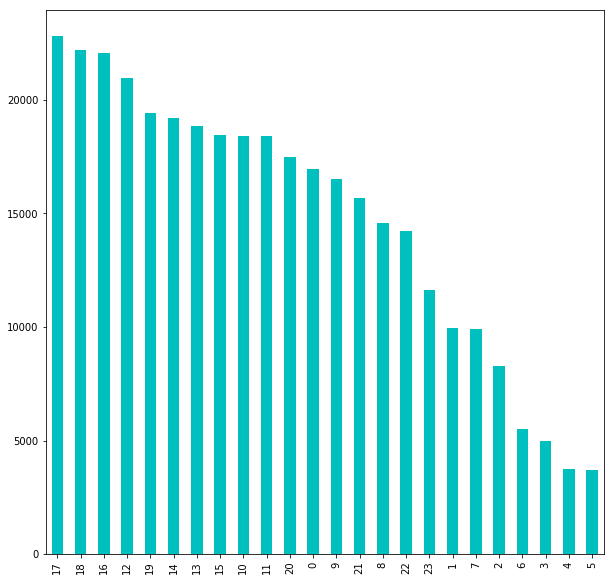

In [38]:
calls_data['hour_of_day'].value_counts().plot(kind='bar', figsize=(10,10),color='c')

0 is midnight (12am), and 23 is 11pm. Numbers are based on the 24-hour clock. It appears that evenings have the highest rates of 911 calls, with 5PM being the most frequent time, followed by 6pm, 4pm, 12pm. 5am has the fewest calls, and generally speaking, dawn and morning times have least frequent calls. This also intuitively makes sense

## Time Deltas between Initial and Clearance times

We are making an assumption that the time delta between At Scene Time and Occurred on time could suggest how long it took to resolve a given 911 call.

In [39]:
calls_data['time_delta'] = (calls_data['AT_SCENE_TIME']-calls_data['OCCURRED_ON_DATE'] ).astype('timedelta64[s]')

In [40]:
time_deltas = list(calls_data['time_delta'].dropna())

In [41]:
np.mean(time_deltas) / 60.0 / 60.0 # Average number of hours to resolve a 911 call

1.7093313674665451

In [42]:
calls_data['OFFENSE_CODE_GROUP'].value_counts()

Larcency                    41723
Accident                    36739
Investigation               33896
Violations                  31344
Others                      31164
Medical Assistance          27346
Assault                     26461
Property                    18237
Vandalism                   17383
Verbal Disputes             15503
Towed                       12697
Missing person located      10347
Warrant Arrests             10077
Burglary                     8375
Fraud                        7058
Auto Theft                   6267
Harassment                   4939
Robbery                      4797
Confidence Games             3594
Police Service Incidents     3227
Disorderly Conduct           2727
Name: OFFENSE_CODE_GROUP, dtype: int64

## Major Crime Indicator Count

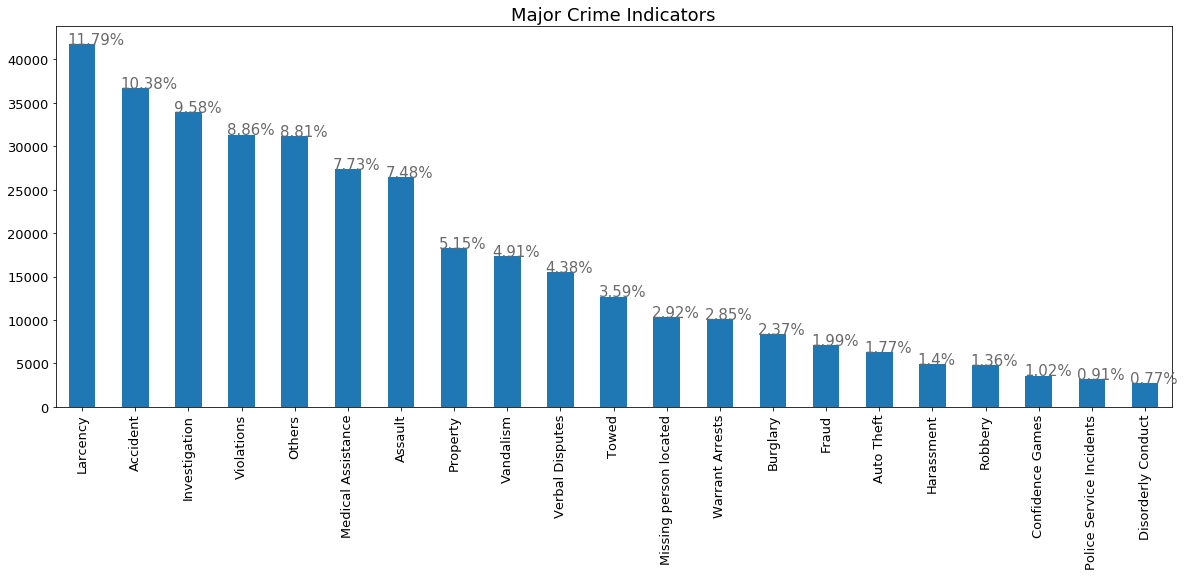

In [43]:
ax = calls_data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(20,7), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Major Crime Indicators", fontsize=18)
#ax.set_ylabel("Number of Battles", fontsize=18);
#ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

## Count of offences by MCI

In [44]:
calls_data.groupby(['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION'])['OFFENSE_DESCRIPTION'].count()

OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION                            
Accident            M/V - LEAVING SCENE - PERSONAL INJURY               1228
                    M/V - LEAVING SCENE - PROPERTY DAMAGE              17217
                    M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY         365
                    M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY      388
                    M/V ACCIDENT - INVOLVING Â BICYCLE - INJURY          761
                    M/V ACCIDENT - OTHER                                2796
                    M/V ACCIDENT - OTHER CITY VEHICLE                    707
                    M/V ACCIDENT - PERSONAL INJURY                      4477
                    M/V ACCIDENT - POLICE VEHICLE                        753
                    M/V ACCIDENT - PROPERTY Â DAMAGE                    6490
                    M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY          1557
Assault             A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.           1
        

In [45]:
calls_data.DAY_OF_WEEK = calls.DAY_OF_WEEK.str.strip()

In [46]:
calls_data['DAY_OF_WEEK'].unique()

array(['Thursday', 'Monday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday',
       'Sunday'], dtype=object)

In [47]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [48]:
calls_data['day_id'] = calls_data.index
calls_data['day_id'] = calls_data['DAY_OF_WEEK'].map(sorterIndex)
calls_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_SUB GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,AT_SCENE_TIME,...,Occupied Housing Units,OFFENSE_CODE_GROUP Category,OFFENSE_DESCRIPTION Category,DISTRICT Category,REPORTING_AREA Category,Zip code Category,day_of_week,hour_of_day,time_delta,day_id
0,0,3006,Medical Assistance,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B3,459,No,2019-04-16 20:57:00,2019-04-16 21:03:24,...,9661,10,209,4,456,12,1,20,384.0,3
1,0,413,Assault,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,291,No,2019-04-16 20:52:00,2019-04-16 23:35:19,...,5057,1,16,3,289,11,1,20,9799.0,0
2,0,802,Assault,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,291,No,2019-04-16 20:52:00,2019-04-16 22:50:50,...,5057,1,20,3,289,11,1,20,7130.0,4
3,0,3410,Towed,Towed,TOWED MOTOR VEHICLE,C11,340,No,2019-04-16 20:25:00,2019-04-16 23:44:04,...,9661,16,216,5,338,12,1,20,11944.0,0
4,0,3301,Verbal Disputes,Verbal Disputes,VERBAL DISPUTE,B2,302,No,2019-04-16 19:55:00,2019-04-16 21:10:29,...,5057,18,225,3,300,11,1,19,4529.0,3


## Major Crime Indicator by day of week

In [49]:
calls_data.groupby(['day_id','DAY_OF_WEEK', 'OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count()

day_id  DAY_OF_WEEK  OFFENSE_CODE_GROUP      
0       Monday       Accident                    5221
                     Assault                     3792
                     Auto Theft                   859
                     Burglary                    1208
                     Confidence Games             503
                     Disorderly Conduct           391
                     Fraud                        983
                     Harassment                   678
                     Investigation               4796
                     Larcency                    6096
                     Medical Assistance          3872
                     Missing person located      1510
                     Others                      4442
                     Police Service Incidents     500
                     Property                    2787
                     Robbery                      657
                     Towed                       1789
                     Vandalism      

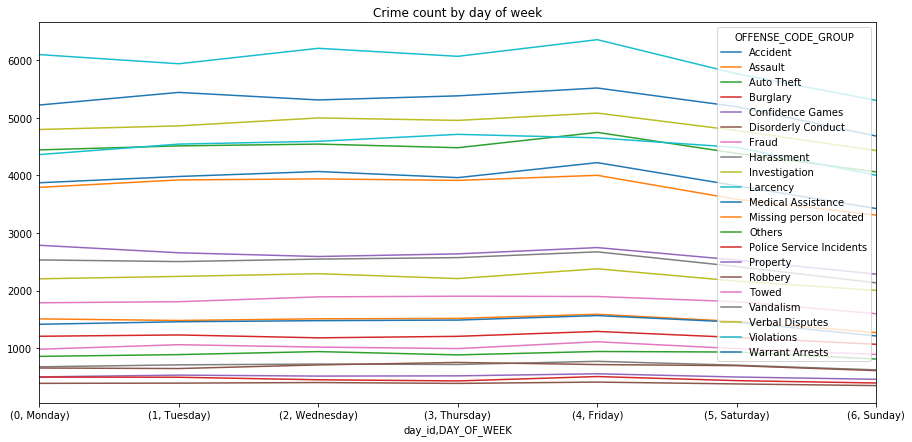

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
plt.title('Crime count by day of week')
#ax.set_xticks('occurrencedayofweek')
#ax.set_xticklabels('occurrencedayofweek', rotation=45, fontsize=10 )
calls_data.groupby(['day_id','DAY_OF_WEEK','OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count().unstack().plot(ax=ax)

## Major Crime Indicator by day of week by hour

In [51]:
calls_data.groupby(['day_id','DAY_OF_WEEK','HOUR','OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count()

day_id  DAY_OF_WEEK  HOUR  OFFENSE_CODE_GROUP      
0       Monday       0     Accident                    159
                           Assault                     210
                           Auto Theft                   40
                           Burglary                     59
                           Confidence Games             67
                           Disorderly Conduct           28
                           Fraud                       114
                           Harassment                   52
                           Investigation               221
                           Larcency                    279
                           Medical Assistance          143
                           Missing person located       86
                           Others                      182
                           Police Service Incidents     18
                           Property                    145
                           Robbery                      43
    

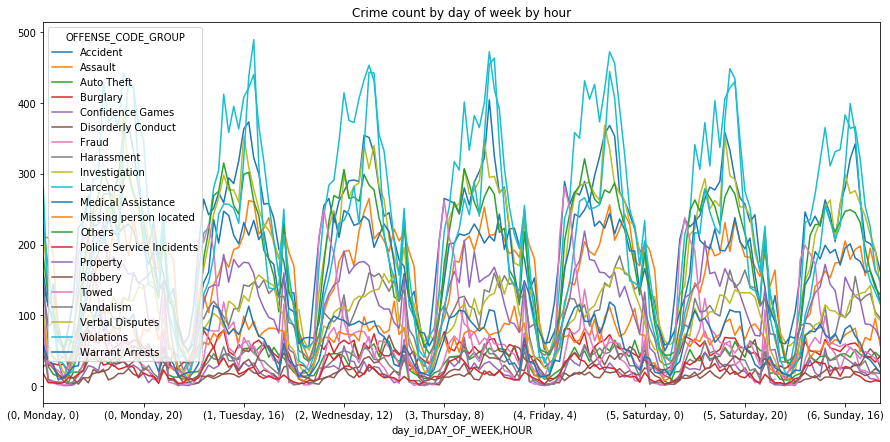

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Crime count by day of week by hour')

#ax.set_xlabel('Day of week by hour')
plt.xlabel('Day of week')
calls_data.groupby(['day_id','DAY_OF_WEEK','HOUR','OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count().unstack().plot(ax=ax)

## Heatmap using Folium

In [22]:
import pandas as pd

In [10]:
dataset = pd.read_excel('zipcode_crimes.xlsx', infer_datetime_format=True)
dataset.head()

,Lat,Long,Zip code,Population,Crimes per zip code
0,42.232,-71.131,2136,28488,0.406733
1,42.232,-71.130,2136,28488,0.406733
2,42.232,-71.129,2136,28488,0.406733
3,42.233,-71.138,2136,28488,0.406733
4,42.233,-71.134,2136,28488,0.406733


In [13]:
import folium
bostonmap = folium.Map([42.257, -71.161], zoom_start=11)
bostonmap

In [14]:
stationArr = dataset[['Lat', 'Long']].as_matrix()

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [15]:
import folium.plugins as plugins
from IPython.display import HTML, display

 
bostonmap.add_children(plugins.HeatMap(stationArr, radius=15))
bostonmap


C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


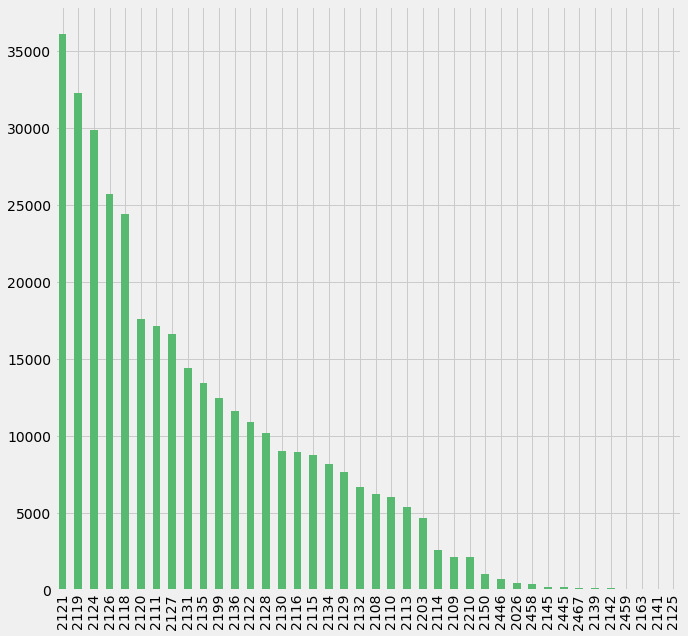

In [67]:
calls_data['Zip code'].value_counts().plot(kind='bar', figsize=(10,10),color='#58b970')

 Many of the calls are concentrated in Roxbury area (02121 zip code). You can Google it !! 

In [99]:
zipfilter =  calls_data['Zip code']==2121
roxbury = calls_data[zipfilter]
roxbury['OFFENSE_CODE_GROUP'].value_counts()

Accident                    4266
Investigation               3437
Others                      3376
Assault                     3109
Violations                  3107
Verbal Disputes             2841
Medical Assistance          2629
Larcency                    2577
Vandalism                   2085
Missing person located      1435
Property                    1143
Warrant Arrests             1042
Towed                        939
Burglary                     905
Auto Theft                   814
Robbery                      576
Fraud                        551
Harassment                   516
Police Service Incidents     272
Confidence Games             251
Disorderly Conduct           191
Name: OFFENSE_CODE_GROUP, dtype: int64

Most number of crimes in Roxbury are related to traffic and motor accidents. Police should be investing more time in planning traffic infrastructure, roads and public transit options.

## Machine Learning

#### Predicting important features using Decison Tree

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 15 rows
features_calls = pd.read_csv('Boston 911 data_crimes.csv')
features_calls.head(15)

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,No,2015,6,19,2026,24711,0.01647,373700,84704,10184,9644
1,413,No,2016,9,18,2026,24711,0.01647,373700,84704,10184,9644
2,413,No,2018,6,17,2026,24711,0.01647,373700,84704,10184,9644
3,413,No,2018,9,12,2026,24711,0.01647,373700,84704,10184,9644
4,423,No,2017,5,13,2026,24711,0.01647,373700,84704,10184,9644
5,423,No,2018,4,12,2026,24711,0.01647,373700,84704,10184,9644
6,423,No,2019,1,12,2026,24711,0.01647,373700,84704,10184,9644
7,520,No,2018,4,17,2026,24711,0.01647,373700,84704,10184,9644
8,520,No,2018,5,19,2026,24711,0.01647,373700,84704,10184,9644
9,522,No,2015,9,8,2026,24711,0.01647,373700,84704,10184,9644


In [17]:
features_calls.dtypes

OFFENSE_CODE                 int64
SHOOTING                    object
YEAR                         int64
MONTH                        int64
HOUR                         int64
Zip code                     int64
Population                   int64
Crimes per population      float64
Median_Home_Value            int64
Median_Household_Income      int64
Housing Units                int64
Occupied Housing Units       int64
dtype: object

In [18]:
features_calls["Crimes per population"]=features_calls["Crimes per population"].astype(float)
#convert data type to float

In [19]:
features_calls.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
count,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,3.539020e+05,353902.000000,353902.000000,353902.000000
mean,2302.300303,2016.845367,6.639335,13.110090,2128.222887,25011.449280,1.247480,4.311201e+05,54043.573469,11002.144404,10198.609324
std,1180.796005,1.162666,3.437019,6.274662,27.821538,12214.337359,1.935986,1.831311e+05,23360.754394,5016.905778,4704.577662
min,111.000000,2015.000000,1.000000,0.000000,2026.000000,1122.000000,0.000000,0.000000e+00,27134.000000,712.000000,650.000000
25%,1001.000000,2016.000000,4.000000,9.000000,2119.000000,20628.000000,0.462711,3.117000e+05,35077.000000,8887.000000,8066.000000
50%,2907.000000,2017.000000,7.000000,14.000000,2122.000000,25861.000000,0.919466,3.505000e+05,48841.000000,11048.000000,10087.000000
75%,3201.000000,2018.000000,10.000000,18.000000,2129.000000,29826.000000,1.272982,5.611000e+05,66735.000000,12967.000000,12314.000000
max,3831.000000,2019.000000,12.000000,23.000000,2467.000000,47783.000000,10.857766,1.000001e+06,133801.000000,20834.000000,19905.000000


In [20]:
features_calls.loc[features_calls['Crimes per population']>0.9,'Crimes per population']=1
features_calls.loc[features_calls['Crimes per population']<0.9,'Crimes per population']=0
features_calls['Crimes per population']=features_calls['Crimes per population'].astype(np.int64)
features_calls.head()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,No,2015,6,19,2026,24711,0,373700,84704,10184,9644
1,413,No,2016,9,18,2026,24711,0,373700,84704,10184,9644
2,413,No,2018,6,17,2026,24711,0,373700,84704,10184,9644
3,413,No,2018,9,12,2026,24711,0,373700,84704,10184,9644
4,423,No,2017,5,13,2026,24711,0,373700,84704,10184,9644


Replace No and Yes value with 1 and 0

In [21]:
features_calls['SHOOTING'] = features_calls['SHOOTING'].apply(lambda x: 0 if x=='No' else 1)

In [22]:
print('The shape of our features is:', features_calls.shape)

The shape of our features is: (353902, 12)


In [23]:
# Descriptive statistics for each column
features_calls.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
count,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,3.539020e+05,353902.000000,353902.000000,353902.000000
mean,2302.300303,0.004171,2016.845367,6.639335,13.110090,2128.222887,25011.449280,0.508217,4.311201e+05,54043.573469,11002.144404,10198.609324
std,1180.796005,0.064446,1.162666,3.437019,6.274662,27.821538,12214.337359,0.499933,1.831311e+05,23360.754394,5016.905778,4704.577662
min,111.000000,0.000000,2015.000000,1.000000,0.000000,2026.000000,1122.000000,0.000000,0.000000e+00,27134.000000,712.000000,650.000000
25%,1001.000000,0.000000,2016.000000,4.000000,9.000000,2119.000000,20628.000000,0.000000,3.117000e+05,35077.000000,8887.000000,8066.000000
50%,2907.000000,0.000000,2017.000000,7.000000,14.000000,2122.000000,25861.000000,1.000000,3.505000e+05,48841.000000,11048.000000,10087.000000
75%,3201.000000,0.000000,2018.000000,10.000000,18.000000,2129.000000,29826.000000,1.000000,5.611000e+05,66735.000000,12967.000000,12314.000000
max,3831.000000,1.000000,2019.000000,12.000000,23.000000,2467.000000,47783.000000,1.000000,1.000001e+06,133801.000000,20834.000000,19905.000000


In [24]:
# Descriptive statistics for each column
features_calls.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
count,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,3.539020e+05,353902.000000,353902.000000,353902.000000
mean,2302.300303,0.004171,2016.845367,6.639335,13.110090,2128.222887,25011.449280,0.508217,4.311201e+05,54043.573469,11002.144404,10198.609324
std,1180.796005,0.064446,1.162666,3.437019,6.274662,27.821538,12214.337359,0.499933,1.831311e+05,23360.754394,5016.905778,4704.577662
min,111.000000,0.000000,2015.000000,1.000000,0.000000,2026.000000,1122.000000,0.000000,0.000000e+00,27134.000000,712.000000,650.000000
25%,1001.000000,0.000000,2016.000000,4.000000,9.000000,2119.000000,20628.000000,0.000000,3.117000e+05,35077.000000,8887.000000,8066.000000
50%,2907.000000,0.000000,2017.000000,7.000000,14.000000,2122.000000,25861.000000,1.000000,3.505000e+05,48841.000000,11048.000000,10087.000000
75%,3201.000000,0.000000,2018.000000,10.000000,18.000000,2129.000000,29826.000000,1.000000,5.611000e+05,66735.000000,12967.000000,12314.000000
max,3831.000000,1.000000,2019.000000,12.000000,23.000000,2467.000000,47783.000000,1.000000,1.000001e+06,133801.000000,20834.000000,19905.000000


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

### Features and Labels and Convert Data to Arrays

In [26]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict: the actual temperature
labels = np.array(features_calls['Crimes per population'])

# Remove the labels from the features, so we have one table for independent variables to predict the actual temperature
# (axis 1 refers to columns)
features_calls = features_calls.drop('Crimes per population', axis = 1)

# Saving feature names for later use
feature_list = list(features_calls.columns)

# Convert to numpy array
features_calls = np.array(features_calls)

### Training and Testing Sets
See scikit-learn's `train_test_split` API [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [27]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_calls, labels, test_size = 0.25,
                                                                           random_state = 42)

In [28]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (265426, 11)
Training Labels Shape: (265426,)
Testing Features Shape: (88476, 11)
Testing Labels Shape: (88476,)


### Train Model

Using `Scikit-learn`'s `RandomForestRegressor`. API [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). `n_estimators` is the number of trees in the forest.

In [29]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Population           Importance: 0.52
Variable: Median_Household_Income Importance: 0.17
Variable: Occupied Housing Units Importance: 0.11
Variable: Housing Units        Importance: 0.1
Variable: Zip code             Importance: 0.09
Variable: Median_Home_Value    Importance: 0.01
Variable: OFFENSE_CODE         Importance: 0.0
Variable: SHOOTING             Importance: 0.0
Variable: YEAR                 Importance: 0.0
Variable: MONTH                Importance: 0.0
Variable: HOUR                 Importance: 0.0


### Visualize and Interpret Model Results

In [31]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.40.1/'

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'crime_tree2.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('crime_tree2.dot')

# Write graph to a png file
graph.write_png('crime_tree2.png'); 

<br />
<center>
<img src = crime_tree2.png width = 1000 />
</center>

In [32]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 5


In [34]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_crime.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_crime.dot')

graph.write_png('small_tree_crime.png');

<br />
<center>
<img src = small_tree_crime.png width = 1000 />
</center>

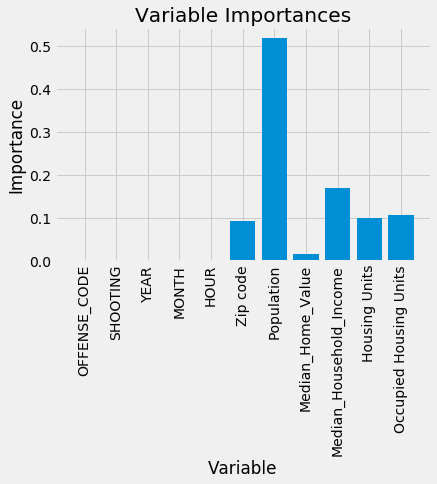

In [35]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## Predicting Crime rate using Logistic Regression

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 15 rows
features_calls = pd.read_csv('Boston 911 data_crimes.csv')
features_calls.head(15)

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,No,2015,6,19,2026,24711,0.01647,373700,84704,10184,9644
1,413,No,2016,9,18,2026,24711,0.01647,373700,84704,10184,9644
2,413,No,2018,6,17,2026,24711,0.01647,373700,84704,10184,9644
3,413,No,2018,9,12,2026,24711,0.01647,373700,84704,10184,9644
4,423,No,2017,5,13,2026,24711,0.01647,373700,84704,10184,9644
5,423,No,2018,4,12,2026,24711,0.01647,373700,84704,10184,9644
6,423,No,2019,1,12,2026,24711,0.01647,373700,84704,10184,9644
7,520,No,2018,4,17,2026,24711,0.01647,373700,84704,10184,9644
8,520,No,2018,5,19,2026,24711,0.01647,373700,84704,10184,9644
9,522,No,2015,9,8,2026,24711,0.01647,373700,84704,10184,9644


In [38]:
features_calls['SHOOTING'] = features_calls['SHOOTING'].apply(lambda x: 0 if x=='No' else 1)

In [39]:
features_calls.loc[features_calls['Crimes per population']>0.9,'Crimes per population']=1
features_calls.loc[features_calls['Crimes per population']<0.9,'Crimes per population']=0
features_calls['Crimes per population']=features_calls['Crimes per population'].astype(np.int64)
features_calls.head()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Crimes per population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,0,2015,6,19,2026,24711,0,373700,84704,10184,9644
1,413,0,2016,9,18,2026,24711,0,373700,84704,10184,9644
2,413,0,2018,6,17,2026,24711,0,373700,84704,10184,9644
3,413,0,2018,9,12,2026,24711,0,373700,84704,10184,9644
4,423,0,2017,5,13,2026,24711,0,373700,84704,10184,9644


In [40]:
X= features_calls.drop(columns=['Crimes per population'],axis=1)
y= features_calls['Crimes per population']

In [41]:
# import sklearn package to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [42]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
model.fit(X_train,y_train)

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions= model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.81      0.83     52323\n           1       0.82      0.85      0.84     53848\n\n   micro avg       0.83      0.83      0.83    106171\n   macro avg       0.83      0.83      0.83    106171\nweighted avg       0.83      0.83      0.83    106171\n'

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[42327,  9996],
       [ 7938, 45910]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

83.10838176149797

#### We acheived accuracy of 83.10 % using logistic regression

## Similarly, finding important features using Decision Tree for shooting

In [49]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 15 rows
features = pd.read_csv('Boston 911 data_ML.csv')
features.head(15)

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,DAY_OF_WEEK,Zip code,Population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,No,2015,6,19,Thursday,2026,24.711,373.7,84.704,10.184,9.644
1,413,No,2016,9,18,Monday,2026,24.711,373.7,84.704,10.184,9.644
2,413,No,2018,6,17,Friday,2026,24.711,373.7,84.704,10.184,9.644
3,413,No,2018,9,12,Monday,2026,24.711,373.7,84.704,10.184,9.644
4,423,No,2017,5,13,Thursday,2026,24.711,373.7,84.704,10.184,9.644
5,423,No,2018,4,12,Wednesday,2026,24.711,373.7,84.704,10.184,9.644
6,423,No,2019,1,12,Wednesday,2026,24.711,373.7,84.704,10.184,9.644
7,520,No,2018,4,17,Monday,2026,24.711,373.7,84.704,10.184,9.644
8,520,No,2018,5,19,Friday,2026,24.711,373.7,84.704,10.184,9.644
9,522,No,2015,9,8,Tuesday,2026,24.711,373.7,84.704,10.184,9.644


In [50]:
features['SHOOTING'] = features['SHOOTING'].apply(lambda x: 0 if x=='No' else 1)

In [51]:
print('The shape of our features is:', features.shape)

The shape of our features is: (353902, 12)


In [52]:
# Descriptive statistics for each column
features.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
count,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000,353902.000000
mean,2302.300303,0.004171,2016.845367,6.639335,13.110090,2128.222887,24.996751,422.343494,53.202326,10.876060,10.081538
std,1180.796005,0.064446,1.162666,3.437019,6.274662,27.821538,12.243715,187.476190,24.123044,5.168586,4.843657
min,111.000000,0.000000,2015.000000,1.000000,0.000000,2026.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1001.000000,0.000000,2016.000000,4.000000,9.000000,2119.000000,20.628000,306.500000,35.077000,8.887000,8.066000
50%,2907.000000,0.000000,2017.000000,7.000000,14.000000,2122.000000,25.861000,327.900000,48.841000,11.048000,10.087000
75%,3201.000000,0.000000,2018.000000,10.000000,18.000000,2129.000000,29.826000,500.000000,66.735000,12.967000,12.314000
max,3831.000000,1.000000,2019.000000,12.000000,23.000000,2467.000000,47.783000,1000.001000,133.801000,20.834000,19.905000


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

One hot encoding takes a **categorical variable** and re-encodes it as a **binary variable** in multiple dimensions. You'll see this often in Machine Learning algorithms.

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |

and converts it into:

| Mon | Tue | Wed | Thu | Fri |
|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   | 0   |
| 0   | 0   | 1   | 0   | 0   |
| 0   | 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 0   | 1   |

See [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). Note that it is often not just a single 1 for each dimension. As long as the resulting vectors are linearly independent, it works. Also, you could choose to reduce the number of dimensions and essentially fuzzy-up the days into each other (e.g. monday and tuesday in one category, wednesday, thursday, and friday in another).

In [54]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.head(5)

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Zip code,Population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,413,0,2015,6,19,2026,24.711,373.7,84.704,10.184,9.644,0,0,0,0,1,0,0
1,413,0,2016,9,18,2026,24.711,373.7,84.704,10.184,9.644,0,1,0,0,0,0,0
2,413,0,2018,6,17,2026,24.711,373.7,84.704,10.184,9.644,1,0,0,0,0,0,0
3,413,0,2018,9,12,2026,24.711,373.7,84.704,10.184,9.644,0,1,0,0,0,0,0
4,423,0,2017,5,13,2026,24.711,373.7,84.704,10.184,9.644,0,0,0,0,1,0,0


### Features and Labels and Convert Data to Arrays

In [55]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict: the actual temperature
labels = np.array(features['SHOOTING'])

# Remove the labels from the features, so we have one table for independent variables to predict the actual temperature
# (axis 1 refers to columns)
features = features.drop('SHOOTING', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

### Training and Testing Sets

In [56]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [57]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (265426, 17)
Training Labels Shape: (265426,)
Testing Features Shape: (88476, 17)
Testing Labels Shape: (88476,)


### Train Model

Using `Scikit-learn`'s `RandomForestRegressor`. API [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). `n_estimators` is the number of trees in the forest.

In [58]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [60]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OFFENSE_CODE         Importance: 0.25
Variable: MONTH                Importance: 0.17
Variable: HOUR                 Importance: 0.16
Variable: YEAR                 Importance: 0.1
Variable: Zip code             Importance: 0.04
Variable: Median_Home_Value    Importance: 0.04
Variable: Population           Importance: 0.03
Variable: Median_Household_Income Importance: 0.03
Variable: Housing Units        Importance: 0.02
Variable: Occupied Housing Units Importance: 0.02
Variable: DAY_OF_WEEK_Friday   Importance: 0.02
Variable: DAY_OF_WEEK_Monday   Importance: 0.02
Variable: DAY_OF_WEEK_Saturday Importance: 0.02
Variable: DAY_OF_WEEK_Sunday   Importance: 0.02
Variable: DAY_OF_WEEK_Thursday Importance: 0.02
Variable: DAY_OF_WEEK_Tuesday  Importance: 0.02
Variable: DAY_OF_WEEK_Wednesday Importance: 0.02


## Plotting Trees

In [61]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.40.1/'

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree2.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree2.dot')

# Write graph to a png file
graph.write_png('tree2.png'); 

<br />
<center>
<img src = tree2.png width = 1000 />
</center>

In [62]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 25


In [123]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree2.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree2.dot')

graph.write_png('small_tree2.png');

<br />
<center>
<img src = small_tree2.png width = 1000 />
</center>

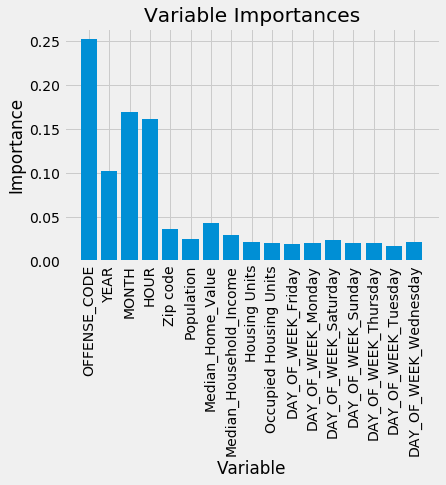

In [110]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## Possibility of shooting in a crime using Logistic Regression

In [111]:
calls_log = pd.read_csv('Boston 911 data_ML.csv')
calls_log.head(15)

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,DAY_OF_WEEK,Zip code,Population,Median_Home_Value,Median_Household_Income,Housing Units,Occupied Housing Units
0,413,No,2015,6,19,Thursday,2026,24.711,373.7,84.704,10.184,9.644
1,413,No,2016,9,18,Monday,2026,24.711,373.7,84.704,10.184,9.644
2,413,No,2018,6,17,Friday,2026,24.711,373.7,84.704,10.184,9.644
3,413,No,2018,9,12,Monday,2026,24.711,373.7,84.704,10.184,9.644
4,423,No,2017,5,13,Thursday,2026,24.711,373.7,84.704,10.184,9.644
5,423,No,2018,4,12,Wednesday,2026,24.711,373.7,84.704,10.184,9.644
6,423,No,2019,1,12,Wednesday,2026,24.711,373.7,84.704,10.184,9.644
7,520,No,2018,4,17,Monday,2026,24.711,373.7,84.704,10.184,9.644
8,520,No,2018,5,19,Friday,2026,24.711,373.7,84.704,10.184,9.644
9,522,No,2015,9,8,Tuesday,2026,24.711,373.7,84.704,10.184,9.644


In [112]:
calls_log['SHOOTING'] = calls_log['SHOOTING'].apply(lambda x: 0 if x=='No' else 1)

In [113]:
# One-hot encode categorical features
calls_log = pd.get_dummies(calls_log)

In [114]:
X= calls_log.drop(columns=['SHOOTING'])
y= calls_log['SHOOTING']

In [115]:
# import sklearn package to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [116]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
model.fit(X_train,y_train)

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
predictions= model.predict(X_test)

In [118]:
from sklearn.metrics import classification_report

In [119]:
classification_report(y_test,predictions)

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    105728\n           1       0.00      0.00      0.00       443\n\n   micro avg       1.00      1.00      1.00    106171\n   macro avg       0.50      0.50      0.50    106171\nweighted avg       0.99      1.00      0.99    106171\n'

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[105728,      0],
       [   443,      0]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9958274858483013

#### We acheived accuracy of 99.58 % using logistic regression

## Conclusion 

#### Findings

1. In the dataset if the column date times are correct and an average 911 call where cops show up at the scene would take about 2 hours to clearance.

2. The top four types of calls are for:
   1. Larceny
   2. Accident
   3. Investigate (Person or Property)
   4. Violations
   
3. Calls are more frequent on Fridays and least frequent on Sunday

4. Calls are more frequent during 5 PM in the evening and least frequent around 5 AM

5. Many of the calls are concentrated in Roxbury area (02121 zip code). You can Google it !! 

6. Most number of crimes in Roxbury are related to traffic and motor accidents. Police should be investing more time in planning traffic infrastructure, roads and public transit options.

7. Used decision tree to obtain population and median house hold income as importnat features to predict crime rate using logistic regression and achieved accuracy of 83%

8. Similarly, found offense_code, year, month and hour to predict the possibility of shooting in a crime and achieved accuracy of 99.58%.

   
   

<br />
<center>
<img src = ipynb.images/police.jpg width = 400 />
</center>

#### References
1. https://github.com/panambY/Capstone.Project-911.Call
2. Hands-On Machine Learning with Scikit-Learn and TensorFlow - Book by Aurélien Géron
3. Course Material
4. Stack Overflow
5. Dataset- https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system